$ \newcommand{\mbf}{\mathbf} $
$ \newcommand{\norm}[1]{\left\Vert#1\right\Vert} $
$ \newcommand{\abs}[1]{\left\vert#1\right\vert} $
$ \newcommand{\Rar}{\Longrightarrow} $
$ \newcommand{\Dar}{\Longleftrightarrow} $

# O método de Euler

## $ \S 1 $ Descrição do método de Euler

O método de Euler é o procedimento mais básico para solução numérica de um problema de valor inicial de primeira ordem em $ \mathbb R^r $:
\begin{equation*}\label{E:ivp}
\begin{cases}
\mbf y' = \mbf F(t, \mbf y) \\
\mbf y(t_0) = \mbf y_0
\end{cases}
\quad \text{onde} \quad \mbf y = \big(y_0, y_1, \dots, y_{r-1}\big). \tag{1}
\end{equation*}

A base do método é a aproximação de $ \mbf y $ pelo seu polinômio de Taylor de ordem 1:
$$
\mbf y(t+h) \approx \mbf y(t) + h\,\mbf y'(t).
$$
Se $ \mbf y $ satisfaz a equação diferencial em \eqref{E:ivp}, então
$$
\mbf y(t+h) \approx \mbf y(t) + h\, \mbf F\big(t, \mbf y(t)\big).
$$
Informalmente, a expressão do lado direito fornece uma estimativa para $ \mbf y $ em $ t+h $ a partir da informação disponível em $ t $. Ela pode ser usada para tabelar os valores sucessivos de $ \mbf y $ com passos de tamanho $ h $ a partir do valor inicial $ \mbf y_0 = \mbf y(t_0) $.

Mais precisamente, sejam $ N \ge 1 $ um inteiro, $ h \ne 0 $ o **tamanho do passo** e 
$$
t_i = t_0 + ih \qquad (i = 0, 1, \dots, N)
$$
os **nodos** correspondentes. No **método de Euler**, definimos a aproximação $ \mbf y_i $ para o valor preciso $ \mbf y(t_i) $ da solução de \eqref{E:ivp} recursivamente de acordo com a fórmula:
$$
\boxed{\mbf y_{i} = \mbf y_{i-1} + h\,\mbf F(t_{i-1}, \mbf y_{i-1}) \quad \text{onde $t_i = t_0 + ih$} \quad (i = 1, \dots, N)}
$$

## $ \S 2 $ Interpretação geométrica

Por simplicidade, suponha que estejamos lidando com uma equação diferencial escalar, ou seja, que $ \mbf y = y $ só tenha uma coordenada. A equação diferencial $ y' = f(t, y) $ nos diz como encontrar o coeficiente angular da reta tangente ao gráfico de uma solução em $ t $ através do valor desta solução aí. O método de Euler parte do valor conhecido em $ t_0 $ para obter uma estimativa para $ y $ em $ t_0 + h $, efetivamente supondo que para $ h $ pequeno, o coeficiente angular não varia muito, e portanto $ y $ é aproximadamente linear entre $ t_0 $ e $ t_0 + h $. O procedimento é repetido para se obter uma estimativa para $ y(t_0 + 2h) $ a partir daquela calculada para $ y(t_0 + h) $, e assim por diante. O resultado é uma curva poligonal que, idealmente, aproxima o gráfico da solução analítica.

Sob outra interpretação, a variação de $ y $ entre $ t $ e $ t + h $ é dada por
$$
y(t+h) - y(t) = \int_t^{t+h} y'(x)\,dx = \int_t^{t+h} f(x,y(x))\,dx.
$$
Esta expressão representa a área com sinal sob o gráfico de $ y' $. O método de Euler a substitui pela área de um retângulo de base $ h $ e altura $ y'(t) = f(t,y(t)) $. O erro cometido é aproximadamente proporcional ao declive de $ y' $, ou seja, a $ y'' $.


## $ \S 3 $ Estimativa para o erro

Pelo teorema de Taylor com resto,
$$
\mbf y(t+h) - \big[\mbf y(t) + h\,\mbf y'(t)\big] = \frac{h^2}{2}\,\mbf y''(c) \quad \text{para algum $ c \in (t, t+h) $}.
$$
Portanto, o **erro local** no método de Euler, i.e., o erro envolvido no primeiro passo, é da ordem de $ \abs{h}^2 $:
$$
\boxed{\mbf E_1 = \mbf y(t_1) - \mbf y_1 \in O(h^2)}
$$
Uma estimativa do **erro global**, ou seja, da diferença
$ \mbf E_N = \mbf y(t_N) - \mbf y_N $
entre o valor exato e o valor aproximado no último nodo $ t_N $, pode ser obtida assumindo-se que o erro a cada passo é constante. Após $ N $ passos, é de se esperar que o erro global seja da ordem de $ \abs{h}$:
$$
\mbf E_N \approx N \mbf E_1 = \frac{t_N - t_0}{h}\,\mbf E_1.
$$
Em símbolos:
$$
\boxed{\mbf E_N = \mbf y(t_N) - \mbf y_N \in O(h)}
$$

📝 Suponha que queiramos aproximar o valor da solução analítica de \eqref{E:ivp} em um determinado $ T > t_0 $ fixo. Para que o erro global seja aceitável, é necessário que o tamanho do passo $ h $ seja muito pequeno. Mas neste caso o número $ N $ de passos requeridos, e portanto de operações efetuadas, será alto, o que causa uma acumulação de erros de arredondamento. Por este motivo, o método de Euler raramente é empregado na solução numérica de EDOs. Sua principal vantagem é a simplicidade da definição.

O teorema seguinte, que não provaremos, detalha melhor o erro global envolvido no método de Euler.

⚡ **Teorema 3.1:** *Suponha que exista uma constante $ C > 0 $ tal que
$$
\norm{\mbf F(t, \mbf z) - \mbf F(t,\mbf w)} \le C \norm{\mbf z -\mbf w} \qquad (\text{para todos }\mbf z,\ \mbf w \in \mathbb R^r)
$$
e seja $ M $ uma cota superior para $ \norm{\mbf y''(t)} $ no intervalo $ [t_0, t_N] $, onde $ \mbf y(t) $ é a solução analítica de \eqref{E:ivp}. Então*
$$
\norm{\mbf E_N} = \norm{\mbf y(t_N) - \mbf y_N} \le \frac{M\abs{h}}{2C}\big(e^{C\abs{t_N - t_0}} - 1\big). \tag*{$ \blacksquare $}
$$

Em particular, para $ t_N = T $ fixo, *o erro global é aproximadamente proporcional a $ h $*, conforme afirmado antes.

## $ \S 4 $ Implementação do método de Euler

In [2]:
def euler(F, t_0, Y_0, T, h):
    """
    Fornece uma solução numérica de um problema de valor inicial de
    1a ordem da forma Y' = F(t, Y), Y(t_0) = Y_0 usando o método de Euler.
    Entradas:
        * A função escalar ou vetorial F(t, Y) que define a EDO.
        * O instante inicial t_0.
        * Um array ou escalar Y_0 tal que Y(t_0) = Y_0 é a condição inicial.
        * O instante T final.
        * O tamanho do passo h.
    Saídas:
        * Um array ts = [t_0, t_1, ..., t_N = T] onde t_i = t_0 + i * h
          para i = 0, 1, ..., N - 1 e T - t_{N - 1} <= h.
        * Um array correspondente Ys = [Y_0, Y_1, ..., Y_N] contendo
          as aproximações para a solução analítica em t_i.
    """
    import numpy as np
    
    
    ts = [t_0]
    Ys = [Y_0]
    t = t_0
    Y = Y_0
    while t < T:
        h = min(h, T - t)
        Y = Y + h * F(t, Y)
        t += h
        Ys.append(Y)
        ts.append(t)
        
    return np.array(ts), np.array(Ys)

## $ \S 5 $ Implementação de procedimentos genéricos para representação tabular e gráfica da solução

### $ 5.1 $ Procedimento genérico para tabelamento da solução numérica

O procedimento seguinte será usado para se imprimir a solução numérica de um problema de valor inicial, na forma de uma tabela. O procedimento é agnóstico quanto ao *método* utilizado para obtenção da solução numérica, que deve ser calculada separadamente e fornecida como entrada. Por isto ele será reutilizado também nos próximos cadernos.

In [3]:
def imprime_solucao(ts, Ys, freq):
    """
    Dados dois arrays ts e Ys de mesmo comprimento, imprime um
    a cada 'freq' de seus valores por linha, na forma de uma
    tabela. Os 0-ésimos e últimos valores sempre são impressos.
    """
    def imprime_cabecalho(r):
        """
        Imprime o cabeçalho da tabela.
        """
        print("\n        t            ", end="")
        for j in range(r):
            print(f"y_{j}          ", end="")
        print()
        for j in range(r + 1):
            print("---------------", end="")
        print()
        
        
    def imprime_linha(t, Y, r):
        """
        Imprime uma das linhas da tabela.
        """
        print("{:13.4f}".format(t), end="")
        # Para dimensão r > 1:
        if r > 1:
            for j in range(r):
                print("{:13.4f}".format(Y[j]), end="")
            print()
        # Para dimensão r = 1:
        else:
            print("{:13.4f}".format(Y))
    
    
    N = len(Ys) - 1        # N + 1 é o número de nodos; N o de passos.
    try:
        r = len(Ys[0])     # Dimensão de cada entrada Y de Ys.
    except TypeError:
        r = 1
    if freq == 0:          # Se freq == 0, imprime apenas os últimos valores.
        freq = N
    imprime_cabecalho(r)
    for i in range(0, N + 1, freq):
        imprime_linha(ts[i], Ys[i], r)
    if i != N:
        imprime_linha(ts[N], Ys[N], r)
        
    return None

### $ 5.2 $ Procedimentos genéricos para representação gráfica da solução numérica

Apresentamos abaixo dois procedimentos para exibição gráfica da solução numérica de um problema de valor inicial de primeira ordem *escalar* (ou seja, com $ r = 1 $):
\begin{equation*}
\begin{cases}
y' = f(t, y) \\
y(t_0) = y_0
\end{cases}
\end{equation*}

Os procedimentos são genéricos, i.e., não dependem do *método* utilizado para produzir a solução numérica. Eles são:
* `plota_poligonal`, que exibe a solução numérica na forma de uma curva poligonal.
* `compara_solucao`, que plota os pontos $ (t_i, y_i) $ $(i = 0, 1, \dots, N) $ da solução numérica juntamente com o gráfico da solução "analítica" (na verdade, uma solução numérica mais precisa).

In [4]:
def plota_poligonal(ts, ys):
    """
    Dados arrays ou listas numéricos ts e ys de mesmo comprimento,
    plota a curva poligonal de vértices (ts[i], ys[i]).
    """
    import matplotlib.pyplot as plt
    
    plt.plot(ts, ys, '-o')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.show()
    
    return None

📝 Para comparação com a solução analítica, utilizaremos o procedimento `odeint` da biblioteca `scipy.integrate`. Ele tampouco resolve exatamente o PVI, porém fornece um resultado numérico que aproxima a solução exata de maneira mais precisa que os métodos que discutiremos.

In [8]:
def compara_solucao(f, t_0, y_0, ts, ys):
    """ Representa graficamente as soluções do PVI (escalar)
            y' = f(t, y), y(t_0) = y_0
        seguintes:
    (1) Uma solução numérica dada pelos dois arrays (ou listas)
        ts e ys, calculada previamente por um método qualquer.
    (2) A solução obtida pela rotina `odeint` da biblioteca SciPy.
    Entradas:
        * A função escalar f(t, y) que define a EDO.
        * O instante inicial t_0.
        * O escalar y_0 tal que y(t_0) = y_0 é a condição inicial.
        * A lista ts dos nodos t_i.
        * A lista ys das aproximações y_i obtidas.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.integrate import odeint
    
    
    ts_exata = np.linspace(t_0, T, num=201)
    ys_exata = odeint(f, y_0, ts_exata, tfirst=True)
    
    plt.plot(ts, ys, 'o')
    plt.plot(ts_exata, ys_exata, '-')
    plt.grid(True)
    plt.xlabel('t')
    plt.ylabel('y')
    plt.legend(("Numérica", "Exata"), loc=0)
    plt.show()
    
    return None

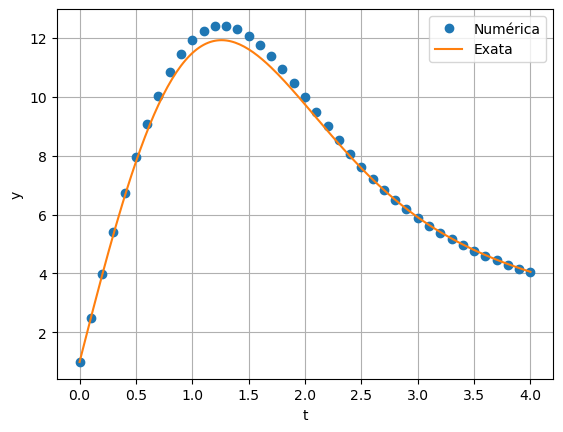

In [7]:
import numpy as np

t_0 = 0
y_0 = 1
h = 0.1
T = 4
def f(t, y):
    return 15 - t * y

ts, ys = euler(f, t_0, y_0, T, h)
compara_solucao(f, t_0, y_0, ts, ys)

## $ \S 6 $ Problemas

**Problema 1:** Considere a equação diferencial de primeira ordem
$$
y' = y, \quad y(0) = 1.
$$

(a) Obtenha a solução analítica.

(b) Use o método de Euler para resolver numericamente a EDO no intervalo $ [0,4] $ com passos $ h $ de tamanhos $ 1 $, $ 0.5 $, $ 0.1 $ e  $ 0.05 $.

(c) Compare graficamente cada uma das soluções numéricas obtidas com a solução "exata" (fornecida pelo procedimento `odeint`).

*Solução:*

**Problema 2:** Considere o problema de valor inicial
\begin{equation*}
\begin{cases}
y' = 3x^2 - 5y + 1 \\
y(0) = -2
\end{cases}
\end{equation*}

(a) Estime $ y(1) $ usando o método de Euler com tamanho do passo $ h $ igual a $ 0.1 $, $ 0.05 $ e $ 0.01 $.

(b) Plote simultaneamente (ou seja, num mesmo diagrama) as três soluções obtidas no item (a). *Dica:* Modifique o procedimento `plota_poligonal` substituindo a entrada `h` por uma lista `hs` que armazena um ou mais tamanhos de passo.

*Solução:*

**Problema 3:** Considere o problema de valor inicial
$$
y'' = -0.1\,y' - t\,, \quad y(0) = 0\,, \quad y'(0) = 1.
$$

(a) Transforme-o num problema de valor inicial da forma 
\begin{equation*}
\begin{cases}
\mbf y' = \mbf F(t, \mbf y) \\
\mbf y(t_0) = \mbf y_0
\end{cases}
\end{equation*}

(b) Integre o PVI usando o método de Euler com tamanho do passo $ h = 0.05 $.

(c) Plote a solução numérica juntamente com a solução analítica
$$
y(t) = 100t - 5t^2 + 990(e^{-0.1t} - 1).
$$
*Dica:* Recorde que $ \mbf y = (y_0, y_1) = (y, y') $. Portanto, antes de plotar a solução numérica, você terá que criar um array extraindo a $ 0 $-ésima coordenada do vetor $ \mbf y_i $, para cada $ i $.

*Solução:*

**Problema 4:** Estude o que acontece com a implementação do método de Euler quando o tamanho do passo $ h $ é *negativo*. Se ela não funciona corretamente neste caso, modifique-a de modo a cobrir esta situação.

*Solução:*

**Problema 5:** O paraquedista Luke Skydiver de massa $ m $ está em queda-livre. O ar imprime uma força de arrasto aerodinâmico de magnitude $ F_A = c\dot y^2 $, onde $ y $ é a *distância* medida a partir de uma altura inicial de $ 500\,\text{m} $. De acordo com a segunda lei de Newton, a EDO que descreve a queda é:
$$
\ddot y = g - \frac{c}{m}\dot y^2.
$$

(a) Reescreva a EDO de ordem $ 2 $ acima numa EDO vetorial de primeira ordem da forma $ \mbf y = F(t,\mbf y) $. 

(b) Assumindo que sua velocidade inicial seja nula, qual é a condição inicial?

(c) Usando o método de Euler com $ h = 0.1 $, determine o tempo total da queda (até que Luke chegue ao chão). Utilize os valores:
$$
g = 9.807\,\text{m/s}^2\,, \quad c = 0.203\,\text{kg/m},\quad m = 80\,\text{kg}.
$$

*Solução:*